# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.model_selection import cross_val_score
import sys
import sklearn
import numpy as np
import os
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [34]:
from scipy.io import loadmat

In [73]:
data = loadmat('data/ejer_1_data1.mat')

#### 3. Create a DataFrame with the features and target

In [25]:
data_keys = data.keys()

data_keys

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [89]:
df = pd.DataFrame(data['X'])
df.head()

,0,1
0,1.9643,4.5957
1,2.2753,3.8589
2,2.9781,4.5651
3,2.9320,3.5519
4,3.5772,2.8560


In [ ]:
df = pd.DataFrame(data['X'])
df.head()
df['target'] = data['y']

In [91]:
df.head(2)

,0,1,target
0,1.9643,4.5957,1
1,2.2753,3.8589,1


#### 4. Plot a scatterplot with the data

<Axes: >

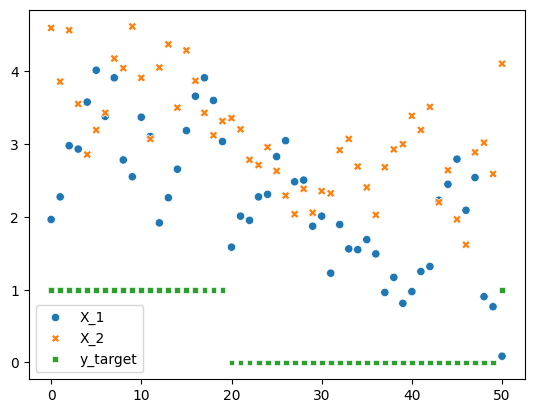

In [36]:
sns.scatterplot(df)

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [59]:
from sklearn.svm import LinearSVC

In [60]:
svc = LinearSVC(C=1, loss='hinge', max_iter=10000, random_state=42)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [ ]:
x = df.drop(columns = 'y')
y = df['y']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [63]:
print(x.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(51, 2)
(51,)
(40, 2)
(11, 2)
(40,)
(11,)


In [64]:
svc.fit(x_train,y_train)

LinearSVC(C=1, loss='hinge', max_iter=10000, random_state=42)

In [65]:
y_pred = svc.predict(x_test)

In [66]:
score = accuracy_score(y_test, y_pred)
score

1.0

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [67]:
for i in range(1,6):
    svc = LinearSVC(C=i, loss='hinge', max_iter=10000, random_state=42)
    svc.fit(x_train,y_train)
    score = svc.score(x_test, y_test)
    
    print('C =', i)
    print('Score: ', score)
    print('-' * 50)

C = 1
Score:  1.0
--------------------------------------------------
C = 2
Score:  1.0
--------------------------------------------------
C = 3
Score:  1.0
--------------------------------------------------
C = 4
Score:  1.0
--------------------------------------------------
C = 5
Score:  1.0
--------------------------------------------------


This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [70]:
svc.decision_function(x)
svc.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=uint8)

#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

### No estoy entendiendo este ejercicio, paso al 2

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [35]:
data2 = loadmat('data/ejer_1_data2.mat')

#### 2. Create a DataFrame with the features and target

In [36]:
data2_set_dict = {'X_1': [],
                 'X_2': [],
                 'y_target': []}

for i,value in enumerate(data2['X']):
    data2_set_dict['X_1'].append(data2['X'][i][0])
    data2_set_dict['X_2'].append(data2['X'][i][1])
for i,value in enumerate(data2['y']):
    data2_set_dict['y_target'].append(data2['y'][i][0])

df2 = pd.DataFrame(data2_set_dict)
### Gracias Manu

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X_1       863 non-null    float64
 1   X_2       863 non-null    float64
 2   y_target  863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB


#### 3. Plot a scatterplot with the data

<Axes: xlabel='X_1', ylabel='X_2'>

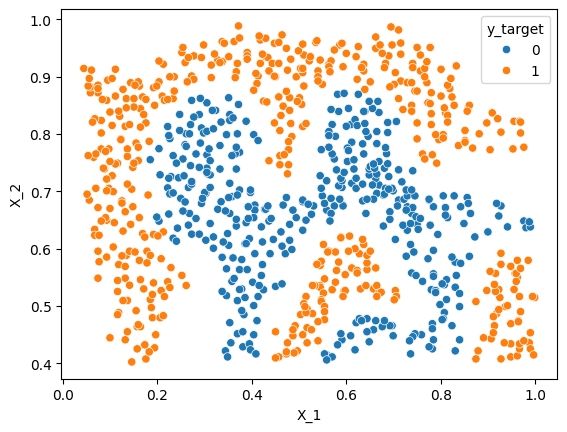

In [37]:
sns.scatterplot(df2, x ='X_1', y = 'X_2', hue = 'y_target')

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [38]:
svc_clf = SVC(C=100, gamma=10, probability=True)

#### 5. Fit the classifier and get the score

In [47]:
x = df2.drop(columns = 'y_target')
y = df2['y_target']

In [ ]:
svc_clf.fit(x, y)

SVC(C=100, gamma=10, probability=True)

In [51]:
svc_clf.score(x,y)

0.9698725376593279

In [53]:
y_pred = svc_clf.predict_proba(x)

### Tampoco entiendo este ejercicio y por que todo me da 1.0 :')

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [86]:
from colorspacious import cspace_converter
from collections import OrderedDict

c:\Users\Hugo Trabajo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
c:\Users\Hugo Trabajo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


AttributeError: Line2D.set() got an unexpected keyword argument 'cmap'

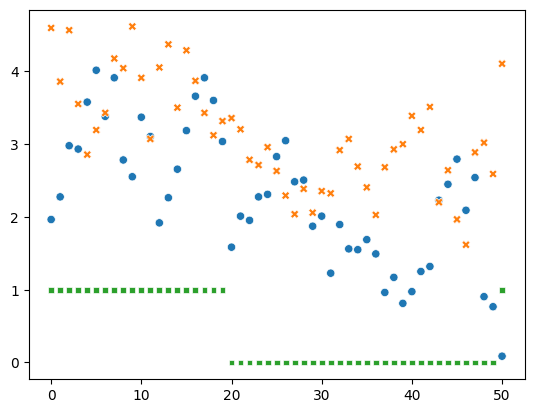

In [88]:
sns.scatterplot(df2, cmap = 'inferno')

no lo entiendo :')